# Initial Exploration of Data

The data for this exploration can be found on the opensource London Datastore:
* https://data.london.gov.uk/dataset/recorded_crime_summary
* https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough

## Notes on Recorded Crime Data

Data is available in two files for each level of geography - the most up to date data covering the last available 24 months only and one covering all historic full calendar years.

In March 2019, the Metropolitan Police Service started to provide offences grouped by the updated Home Office crime classifications . This currently only covers the most recent 24 months of data, but historic data using the previous categories is available separately back to January 2008.

Below is a list of the crime types covered under the new HO categories (*not available at LSOA level):

<u>Arson and Criminal Damage:</u>
* Arson
* Criminal Damage

<u>Burglary:</u>
* Burglary - Business and Community
* Burglary - Residential**

<u>Drug Offences:</u>
* Drug Trafficking
* Possession of Drugs

<u>Miscellaneous Crimes Against Society:</u> 
* Absconding from Lawful Custody 
* Bail Offences
* Bigamy 
* Concealing an Infant Death Close to Birth
* Dangerous Driving
* Disclosure, Obstruction, False or Misleading State
* Exploitation of Prostitution 
* Forgery or Use of Drug Prescription
* Fraud or Forgery Associated with Driver Records 
* Going Equipped for Stealing 
* Handling Stolen Goods 
* Making, Supplying or Possessing Articles for use i 
* Obscene Publications 
* Offender Management Act
* Other Forgery
* Other Notifiable Offences 
* Perjury 
* Perverting Course of Justice 
* Possession of False Documents 
* Profitting From or Concealing Proceeds of Crime 
* Soliciting for Prostitution
* Threat or Possession With Intent to Commit Crimina 
* Wildlife Crime

<u>Possession of Weapons:</u> 
* Other Firearm Offences 
* Possession of Firearm with Intent 
* Possession of Firearms Offences 
* Possession of Other Weapon 
* Possession of Article with Blade or Point

<u>Public Order Offences:</u> 
* Other Offences Against the State, or Public Order 
* Public Fear Alarm or Distress 
* Racially or Religiously Aggravated Public Fear 
* Violent Disorder

<u>Robbery:</u> 
* Robbery of Business Property 
* Robbery of Personal Property

<u>Sexual Offences:</u> 
* Other Sexual Offences 
* Rape

<u>Theft:</u> 
* Bicycle Theft 
* Other Theft 
* Shoplifting
* Theft from Person

<u>Vehicle Offences:</u> 
* Aggravated Vehicle Taking 
* Interfering with a Motor Vehicle 
* Theft from a Motor Vehicle 
* Theft or Taking of a Motor Vehicle

<u>Violence Against the Person:</u> 
* Homicide 
* Violence with Injury 
* Violence without Injury

 Fraud data was transferred from individual police forces to National Action Fraud in March 2013

**Prior to April 2017, police recorded burglary offence categories were split such that dwellings (domestic burglary) and buildings other than dwellings (non-domestic burglary) were separately identifiable, where:
* domestic burglary covers residential premises, including attached buildings such as garages
* non-domestic burglary covers non-residential premises, including businesses and public buildings, as well as non-attached buildings within the grounds of a dwelling, such as sheds and detached garages

**From April 2017 onwards a new classification of police recorded burglary was introduced, dividing offences into two categories of “residential” and “business and community”.
* “Residential” burglary includes all buildings or parts of buildings that are within the boundary of, or form a part of, a dwelling and includes the dwelling itself, vacant dwellings, sheds, garages, outhouses, summer houses and any other structure that meets the definition of a building. It also includes other premises used for residential purposes such as houseboats, residential care homes and hostels.
* “Business and community” burglary includes all buildings or parts of buildings that are used solely and exclusively for business purposes or are otherwise entirely outside the classification of residential burglary.

## Notes on Population Density Data

Land area and population density figures for 2001 to 2050 for wards and boroughs. Ward data begins in 2011.

Population figure included are GLA estimate (2016-based projections), 2011 Census and ONS Mid-year Estimates.

Inland area takes account of water line. Areas with large bodies of water will have a smaller inland area than total area since some of the area will be water.

Land area figures are taken from Ordnance Survey boundaries using MapInfo.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Fixed Variables

In [2]:
url_borough_historical = 'https://data.london.gov.uk/download/recorded_crime_summary/934f2ddb-5804-4c6a-a17c-bdd79b33430e/MPS%20Borough%20Level%20Crime%20%28Historical%29.csv0'
url_borough_current = 'https://data.london.gov.uk/download/recorded_crime_summary/f2cf9458-24f0-47fa-bfc0-54b8d35be628/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv'

## High Level Data Exploration 

### Borough Crime Data

In [4]:
df_historical = pd.read_csv(url_borough_historical)
df_current = pd.read_csv(url_borough_current)

In [5]:
df_historical.head()

,MajorText,MinorText,LookUp_BoroughName,201004,201005,201006,201007,201008,201009,201010,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,11,10,6,6,13,...,6,4,6,6,5,4,12,5,7,6
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,208,193,227,220,204,163,199,...,104,80,99,128,141,130,144,111,126,109
2,Burglary,Burglary Business and Community,Barking and Dagenham,49,58,59,47,46,51,52,...,18,14,12,30,24,21,29,27,37,20
3,Burglary,Domestic Burglary,Barking and Dagenham,118,102,124,137,153,136,116,...,90,71,75,81,66,61,87,62,83,87
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9,6,5,12,9,7,11,...,11,12,9,9,7,6,11,19,18,12


In [6]:
df_current.head()

,MajorText,MinorText,LookUp_BoroughName,202112,202201,202202,202203,202204,202205,202206,...,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311
0,Arson and Criminal Damage,Arson,Barking and Dagenham,1,4,4,3,5,5,5,...,3,2,2,5,2,5,8,5,4,3
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,116,126,110,116,126,120,142,...,101,118,103,109,126,136,117,130,97,92
2,Burglary,Burglary Business and Community,Barking and Dagenham,14,19,29,30,17,16,23,...,18,35,36,28,30,25,32,41,30,20
3,Burglary,Domestic Burglary,Barking and Dagenham,91,81,67,77,81,75,52,...,39,56,63,50,65,50,75,86,71,64
4,Drug Offences,Drug Trafficking,Barking and Dagenham,10,14,11,19,15,17,17,...,12,28,25,26,36,21,16,20,37,21


Both current and historical crime datasets share the same format:
* MajorText - crime category
* MinorText - specific crime
* LookUp_BoroughName - borough
* yyyymm - year and month columns containing specific crime counts at borough levels

Historical data ends at 2021/11 with current data beginning at 2021/12 running up to the current date

In [7]:
df_historical.shape, df_current.shape

((1728, 143), (1581, 27))

Both datasets have a different shape

We expect column counts to be different due to the different time periods in which the data covers, however different row counts suggest some combinations of MajorText/MinorText/LookUp_BoroughName do not align in each data set

Let's see if each dataset is populated with the same values

In [8]:
set(df_historical['MajorText']) == set(df_current['MajorText']), \
set(df_historical['MinorText']) == set(df_current['MinorText']), \
set(df_historical['LookUp_BoroughName']) == set(df_current['LookUp_BoroughName'])

(True, True, True)

Each dataset contains the same unique entries in Major/Minor/Borough columns, we I shall explore which combinations are uncommon and begin to investigate why

In [9]:
# By concatenating and dropping duplicates I can highlight combinations that are unique to one dataset or the other
# I'm adding a prefix to the index so that I can retain knowledge of which dataset the unique combination comes from for investigative purposes

df_unique = pd.concat([df_current[['MajorText', 'MinorText', 'LookUp_BoroughName']].add_prefix('current_', axis=0),
                       df_historical[['MajorText', 'MinorText', 'LookUp_BoroughName']].add_prefix('historical_', axis=0)]).drop_duplicates(keep=False)
df_unique

,MajorText,MinorText,LookUp_BoroughName
current_17,Miscellaneous Crimes Against Society,Offender Management Act,Barking and Dagenham
current_26,Possession of Weapons,Other Knife Offences,Barking and Dagenham
current_105,Miscellaneous Crimes Against Society,Absconding from Lawful Custody,Bexley
current_162,Miscellaneous Crimes Against Society,Offender Management Act,Brent
current_257,Miscellaneous Crimes Against Society,Offender Management Act,Camden
...,...,...,...
historical_1650,Miscellaneous Crimes Against Society,Wildlife Crime,Wandsworth
historical_1659,Public Order Offences,Violent Disorder,Wandsworth
historical_1681,Historical Fraud and Forgery,Historical Fraud and Forgery,Westminster
historical_1694,Miscellaneous Crimes Against Society,Offender Management Act,Westminster


There are a total of 181 combinations that are uncommon between both datasets.

I suspect that combinations may be missing in either data set due to one of two reasons:
* A particular crime having not been recorded in the time period within a borough
* A particular crime no longer being recorded beyond a certain time point

I will begin to explore the numbers below to highlight any trends, this will provide reasoning for dropping, nulling or zeroing in data where it is missing.

In [10]:
len(df_unique['MajorText'].value_counts(ascending=True))

7

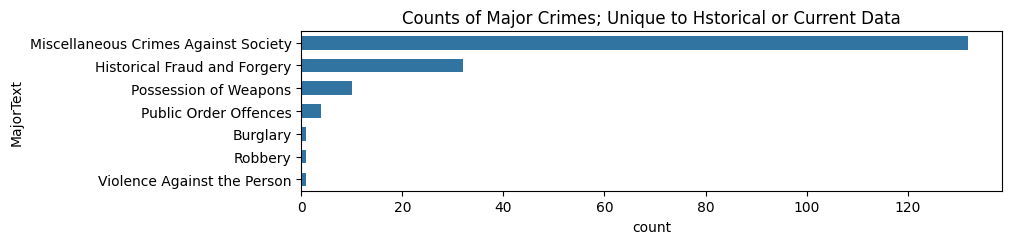

In [15]:
fig, ax = plt.subplots(figsize=(10,len(df_unique['MajorText'].value_counts())/3), constrained_layout=True)
ax.set_title('Counts of Major Crimes; Unique to Hstorical or Current Data')
sns.countplot(y='MajorText', data=df_unique, order=df_unique['MajorText'].value_counts().index, width=0.6);

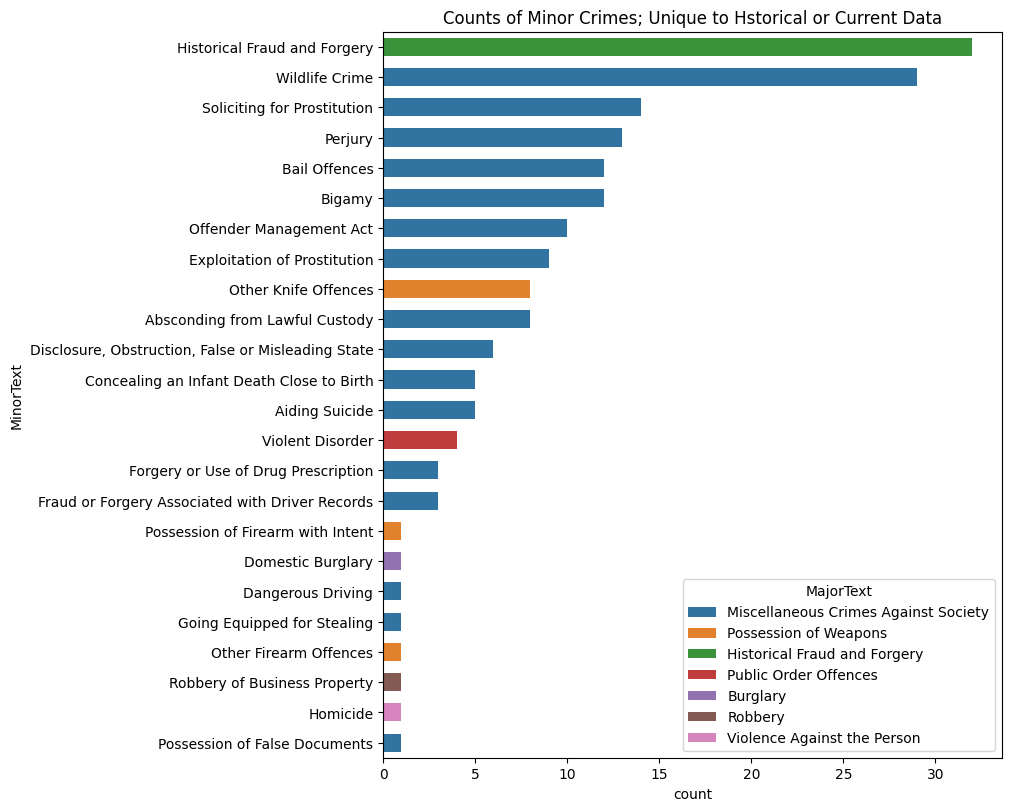

In [12]:
fig, ax = plt.subplots(figsize=(10,df_unique['MinorText'].nunique()/3), constrained_layout=True)
ax.set_title('Counts of Minor Crimes; Unique to Hstorical or Current Data')
sns.countplot(y='MinorText', data=df_unique, hue='MajorText', order=df_unique['MinorText'].value_counts().index, width=0.6);

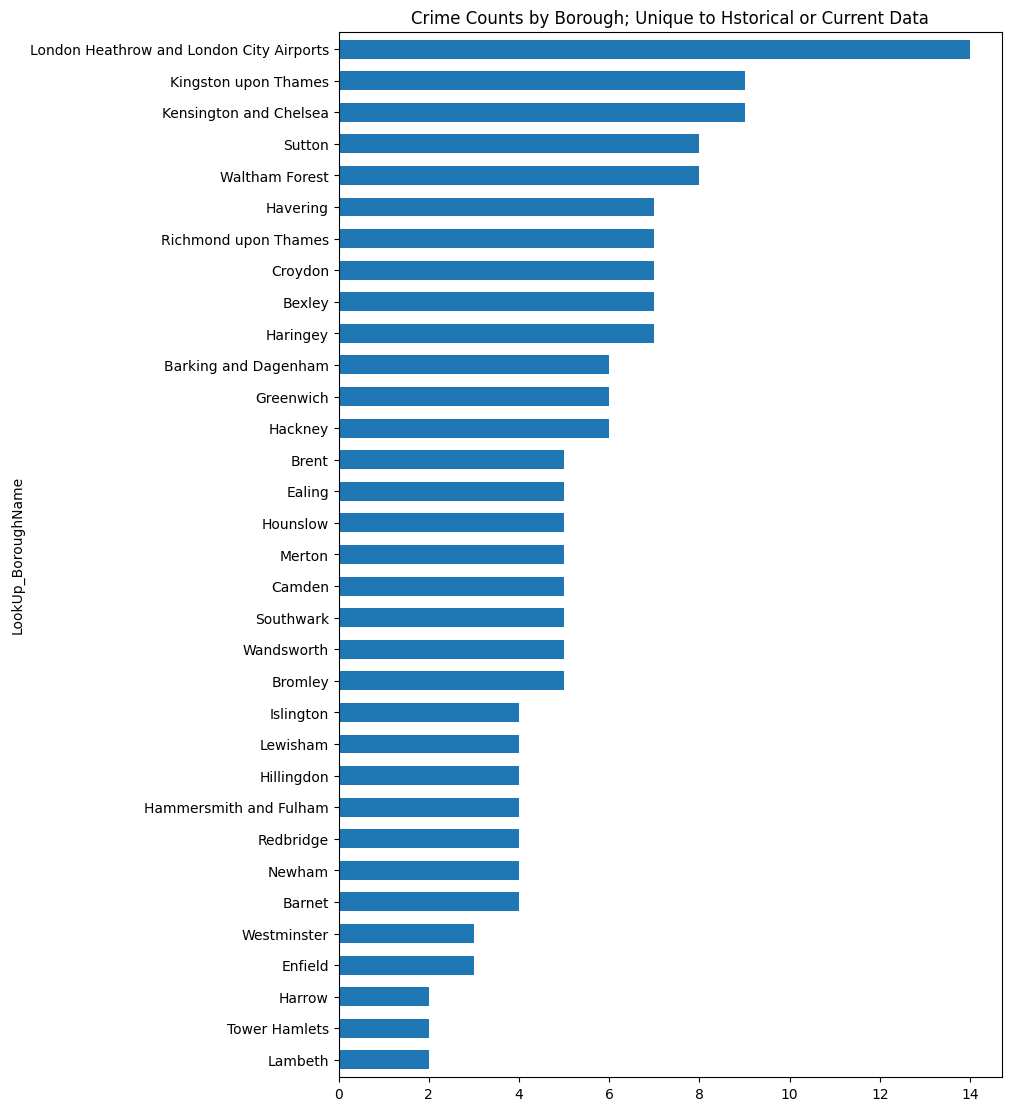

In [13]:
fig, ax = plt.subplots(figsize=(10,len(df_unique['LookUp_BoroughName'].value_counts())/3), constrained_layout=True)
ax.set_title('Crime Counts by Borough; Unique to Hstorical or Current Data')
df_unique['LookUp_BoroughName'].value_counts(ascending=True).plot(kind='barh', width=0.6);

The above counts highlight a few things:
* Miscellaneous crime are most commonly absent - however this is a large catergory filled with more obscure crimes so it not a surprise to see it rank highly
* Minor category crimes link one-to-one with boroughs - Historical Fraud and Forgery and Wildlife Crime rank particularly high here and will be investigated
* I will investigate crime levels in Boroughs that rank highly on this list

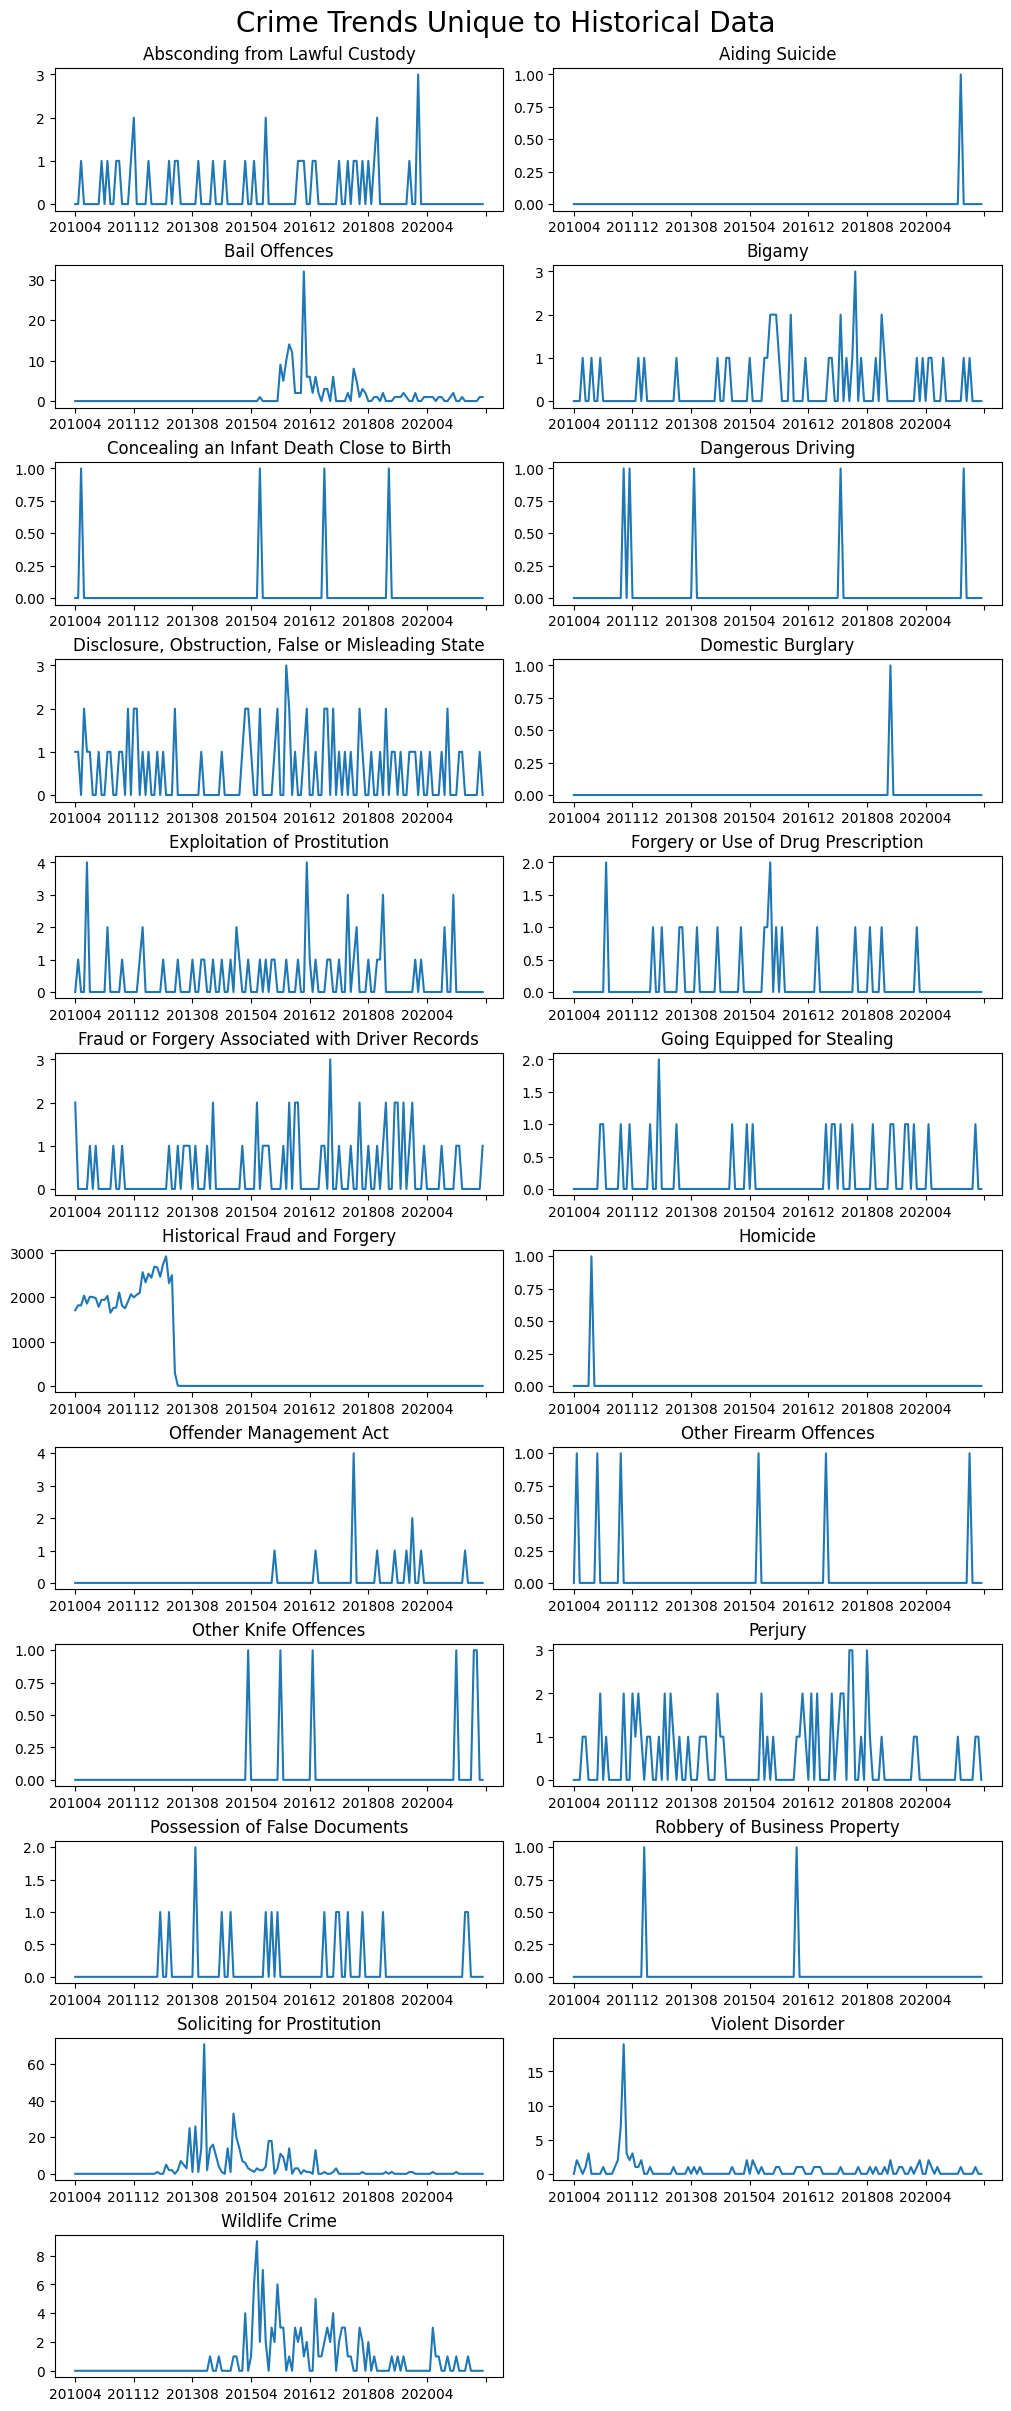

In [16]:
df_temp = df_historical.loc[[int(x.split('_')[-1]) for x in df_unique.filter(like='historical', axis=0).index]].groupby('MinorText').sum(numeric_only=True).reset_index()

fig, axes = plt.subplots(nrows=int(np.ceil(len(df_temp)/2)), ncols=2, figsize=(10,len(df_temp) + np.mod(len(df_temp), 2)), constrained_layout=True)
fig.suptitle('Crime Trends Unique to Historical Data', fontsize=20)

if np.mod(len(df_temp), 2):
    axes[-1, -1].set_axis_off()

for index, row in df_temp.iterrows():

    ax=axes[int(np.floor(index/2)), np.mod(index, 2)]
    row[1:].plot(ax=ax, title=row.iloc[0])

Most crimes in the above figure show a sporadic trend, and so it is conceivable that they have simply not occured within the current dataset.

A few crimes show a spike at some point in the historical data set: Bail Offences, Soliciting for Prostitution, Violent Disorder & Wildlife Crime. However, they show a more sporadic trend in the most recent months, and so again, it is conceivable that they have simply not occured within the current dataset. It may be worth investigating the reasoning for these spikes and drop-offs, such as changes in recording of crime, political campaigns and/or any socio-economic changes, however I will leave such in-depth investigation out of scope for this project.

There is one chart that stands out in the above figure, and that is Historical Fraud and Forgery. After initially recording rather high numbers of crime, there is a very sudden drop off, I will investigate further

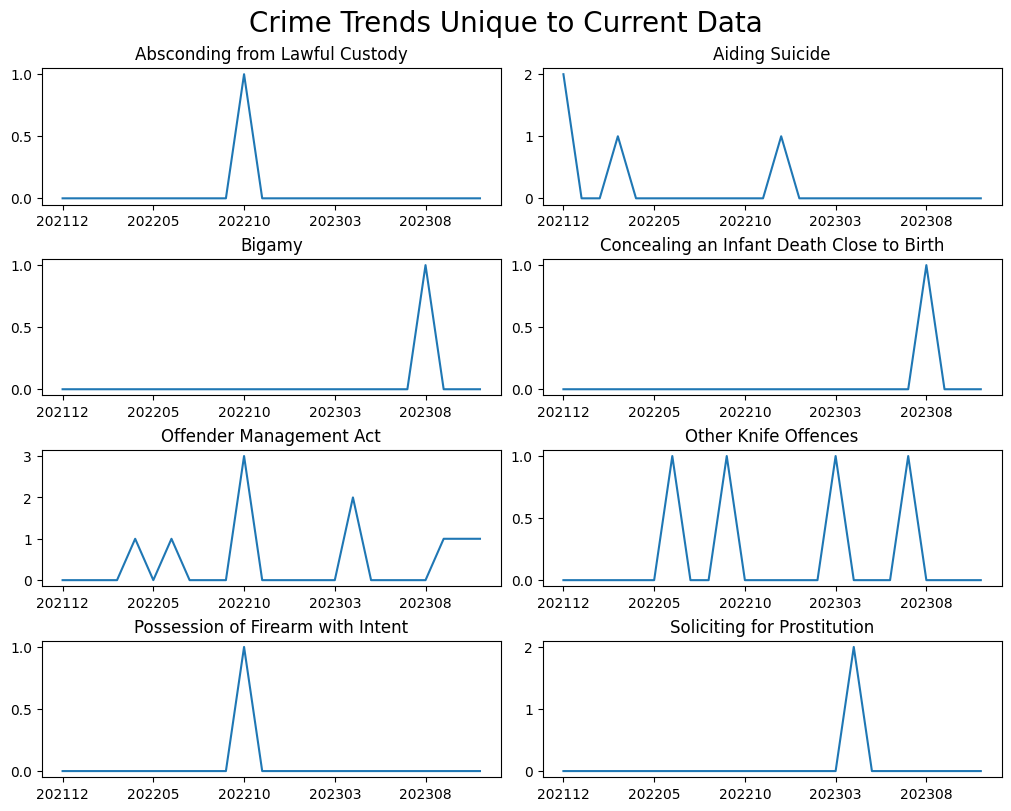

In [17]:
df_temp = df_current.loc[[int(x.split('_')[-1]) for x in df_unique.filter(like='current', axis=0).index]].groupby('MinorText').sum(numeric_only=True).reset_index()

fig, axes = plt.subplots(nrows=int(np.ceil(len(df_temp)/2)), ncols=2, figsize=(10,len(df_temp) + np.mod(len(df_temp), 2)), constrained_layout=True)
fig.suptitle('Crime Trends Unique to Current Data', fontsize=20)

if np.mod(len(df_temp), 2):
    axes[-1, -1].set_axis_off()

for index, row in df_temp.iterrows():

    ax=axes[int(np.floor(index/2)), np.mod(index, 2)]
    row[1:].plot(ax=ax, title=row.iloc[0])

The crimes shown above are unique to the current dataset, and they all show a very sporadic trend in recorded crime. I will assume that they are not included in the historical dataset due to low level recording of these crimes.

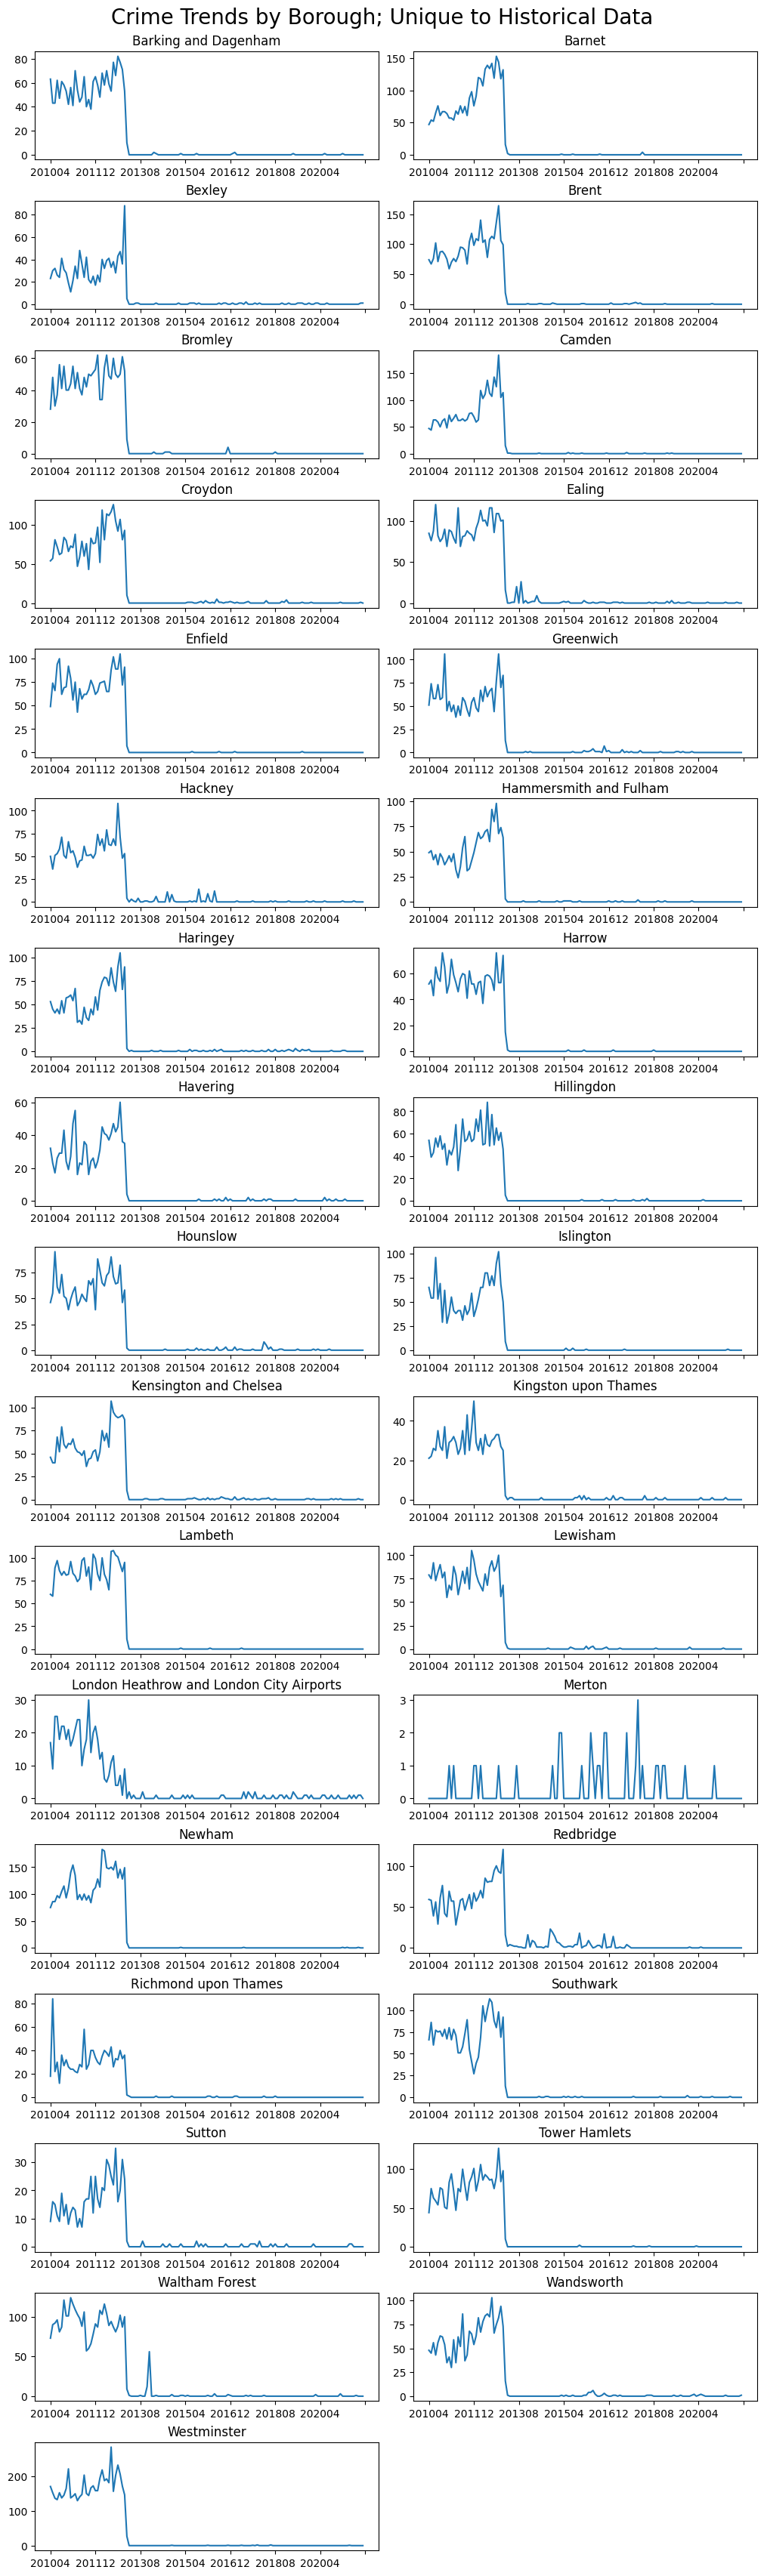

In [18]:
df_temp = df_historical.loc[[int(x.split('_')[-1]) for x in df_unique.filter(like='historical', axis=0).index]].groupby('LookUp_BoroughName').sum(numeric_only=True).reset_index()

fig, axes = plt.subplots(nrows=int(np.ceil(len(df_temp)/2)), ncols=2, figsize=(10,len(df_temp) + np.mod(len(df_temp), 2)), constrained_layout=True)
fig.suptitle('Crime Trends by Borough; Unique to Historical Data', fontsize=20)

if np.mod(len(df_temp), 2):
    axes[-1, -1].set_axis_off()

for index, row in df_temp.iterrows():

    ax=axes[int(np.floor(index/2)), np.mod(index, 2)]
    row[1:].plot(ax=ax, title=row.iloc[0])

The above charts appear to be heavily influenced by the trend in recorded Historical Fraud and Forgery

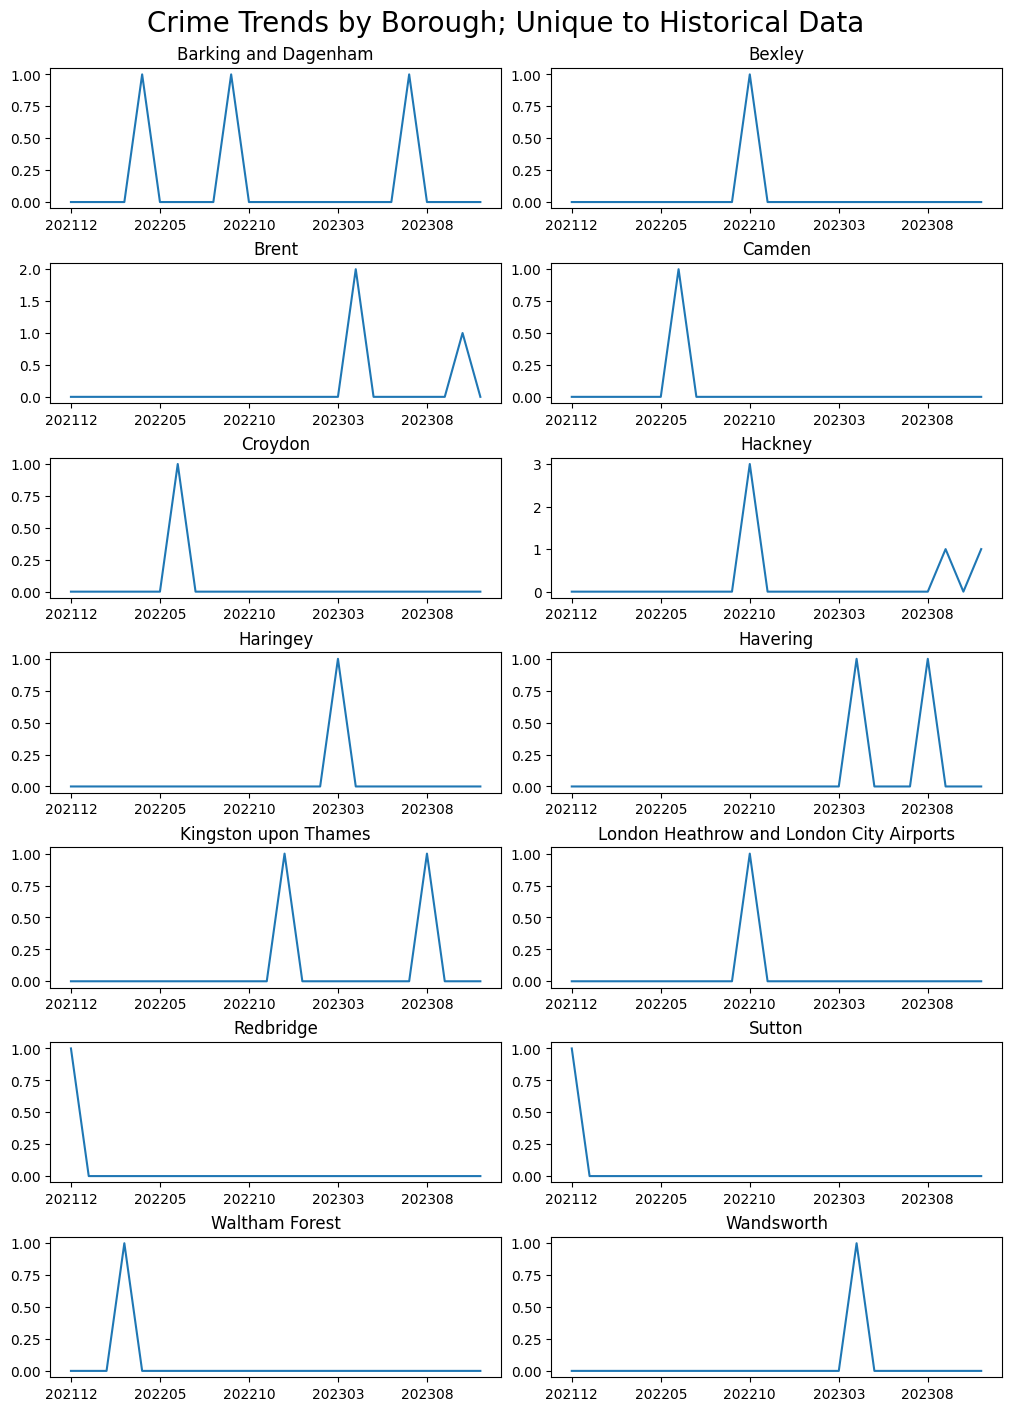

In [19]:
df_temp = df_current.loc[[int(x.split('_')[-1]) for x in df_unique.filter(like='current', axis=0).index]].groupby('LookUp_BoroughName').sum(numeric_only=True).reset_index()

fig, axes = plt.subplots(nrows=int(np.ceil(len(df_temp)/2)), ncols=2, figsize=(10, len(df_temp) + np.mod(len(df_temp), 2)), constrained_layout=True)
fig.suptitle('Crime Trends by Borough; Unique to Historical Data', fontsize=20)

if np.mod(len(df_temp), 2):
    axes[-1, -1].set_axis_off()

for index, row in df_temp.iterrows():

    ax=axes[int(np.floor(index/2)), np.mod(index, 2)]
    row[1:].plot(ax=ax, title=row.iloc[0])

The crimes shown above are unique to the current dataset, and they all show a very sporadic trend in recorded crime. I will assume that they are not included in the historical dataset due to low level recording of these crimes.

#### Historical Fraud and Forgery

In [20]:
df_unique[df_unique['MinorText']=='Historical Fraud and Forgery']

,MajorText,MinorText,LookUp_BoroughName
historical_6,Historical Fraud and Forgery,Historical Fraud and Forgery,Barking and Dagenham
historical_58,Historical Fraud and Forgery,Historical Fraud and Forgery,Barnet
historical_111,Historical Fraud and Forgery,Historical Fraud and Forgery,Bexley
historical_162,Historical Fraud and Forgery,Historical Fraud and Forgery,Brent
historical_213,Historical Fraud and Forgery,Historical Fraud and Forgery,Bromley
historical_265,Historical Fraud and Forgery,Historical Fraud and Forgery,Camden
historical_317,Historical Fraud and Forgery,Historical Fraud and Forgery,Croydon
historical_370,Historical Fraud and Forgery,Historical Fraud and Forgery,Ealing
historical_423,Historical Fraud and Forgery,Historical Fraud and Forgery,Enfield
historical_477,Historical Fraud and Forgery,Historical Fraud and Forgery,Greenwich


In [21]:
df_current[df_current['MinorText']=='Historical Fraud and Forgery']

,MajorText,MinorText,LookUp_BoroughName,202112,202201,202202,202203,202204,202205,202206,...,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311
1104,Historical Fraud and Forgery,Historical Fraud and Forgery,Merton,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Historical Fraud and Forgery appears overwhelmingly in the historical data, and only once in the current dataset. 

Noteably the one occurance appears in 2021/12 which is the earliest point in the dataset.

<Axes: >

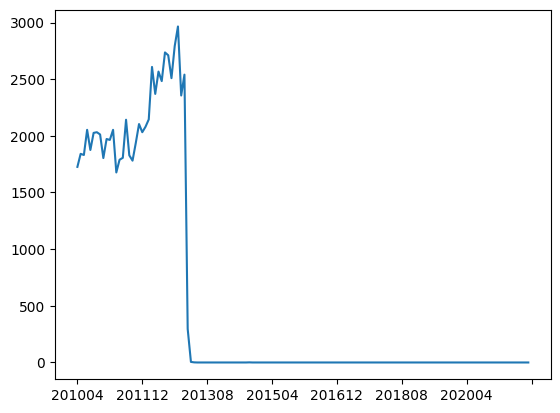

In [22]:
df_historical[df_historical['MinorText']=='Historical Fraud and Forgery'].sum()[3:].plot()

<Axes: >

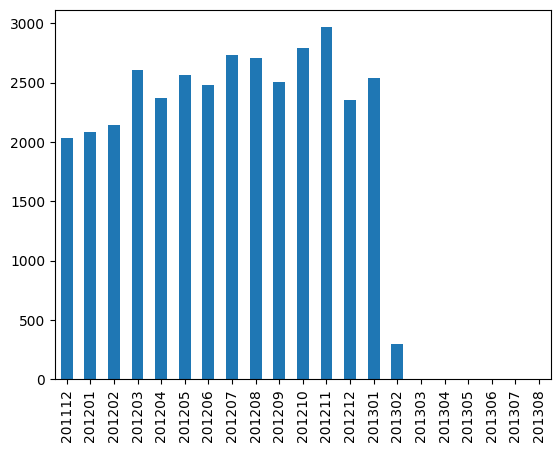

In [24]:
df_historical[df_historical['MinorText']=='Historical Fraud and Forgery'].sum()['201112':'201308'].plot(kind='bar')

The above plots show a sudden drop off in recorded Historical Fraud and Forgery around 2013/02

Taken from the dataset notes:
* Fraud data was transferred from individual police forces to National Action Fraud in March 2013

Due to a short timeline of data that is no longer relevent, I will make the decision to drop Historical Fraud and Forgery from both historical and current datasets

In [25]:
df_historical.drop(df_historical[df_historical['MinorText']=='Historical Fraud and Forgery'].index, inplace=True)
df_current.drop(df_historical[df_historical['MinorText']=='Historical Fraud and Forgery'].index, inplace=True)

In [30]:
# By concatenating and dropping duplicates I can highlight combinations that are unique to one dataset or the other
# I'm adding a prefix to the index so that I can retain knowledge of which dataset the unique combination comes from for investigative purposes

df_unique = pd.concat([df_current[['MajorText', 'MinorText', 'LookUp_BoroughName']].add_prefix('current_', axis=0),
                       df_historical[['MajorText', 'MinorText', 'LookUp_BoroughName']].add_prefix('historical_', axis=0)]).drop_duplicates(keep=False)
df_unique

,MajorText,MinorText,LookUp_BoroughName
current_17,Miscellaneous Crimes Against Society,Offender Management Act,Barking and Dagenham
current_26,Possession of Weapons,Other Knife Offences,Barking and Dagenham
current_105,Miscellaneous Crimes Against Society,Absconding from Lawful Custody,Bexley
current_162,Miscellaneous Crimes Against Society,Offender Management Act,Brent
current_257,Miscellaneous Crimes Against Society,Offender Management Act,Camden
...,...,...,...
historical_1631,Miscellaneous Crimes Against Society,Bail Offences,Wandsworth
historical_1650,Miscellaneous Crimes Against Society,Wildlife Crime,Wandsworth
historical_1659,Public Order Offences,Violent Disorder,Wandsworth
historical_1694,Miscellaneous Crimes Against Society,Offender Management Act,Westminster


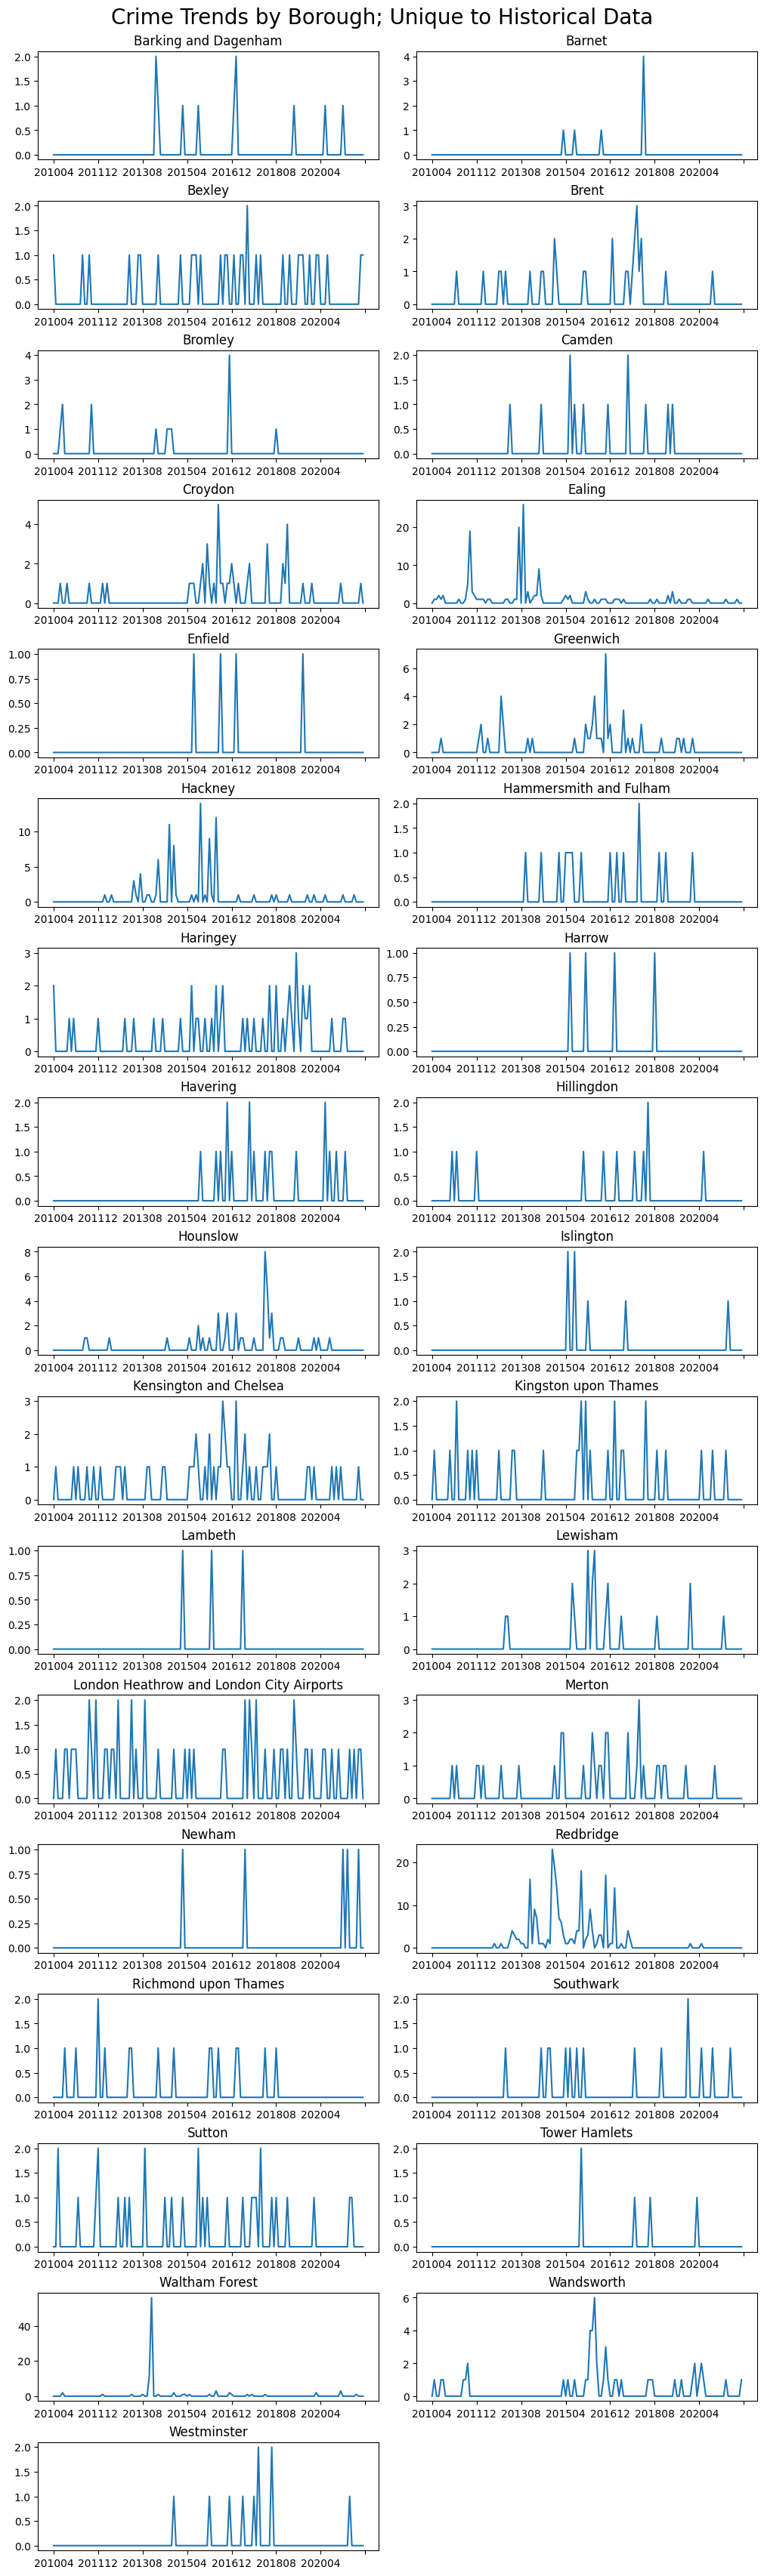

In [31]:
df_temp = df_historical.loc[[int(x.split('_')[-1]) for x in df_unique.filter(like='historical', axis=0).index]].groupby('LookUp_BoroughName').sum(numeric_only=True).reset_index()

fig, axes = plt.subplots(nrows=int(np.ceil(len(df_temp)/2)), ncols=2, figsize=(10,len(df_temp) + np.mod(len(df_temp), 2)), constrained_layout=True)
fig.suptitle('Crime Trends by Borough; Unique to Historical Data', fontsize=20)

if np.mod(len(df_temp), 2):
    axes[-1, -1].set_axis_off()

for index, row in df_temp.iterrows():

    ax=axes[int(np.floor(index/2)), np.mod(index, 2)]
    row[1:].plot(ax=ax, title=row.iloc[0])

In [36]:
df_current.isna().sum().any(), df_historical.isna().sum().any()

(False, False)

In [42]:
df_historical.head()

,MajorText,MinorText,LookUp_BoroughName,201004,201005,201006,201007,201008,201009,201010,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,11,10,6,6,13,...,6,4,6,6,5,4,12,5,7,6
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,208,193,227,220,204,163,199,...,104,80,99,128,141,130,144,111,126,109
2,Burglary,Burglary Business and Community,Barking and Dagenham,49,58,59,47,46,51,52,...,18,14,12,30,24,21,29,27,37,20
3,Burglary,Domestic Burglary,Barking and Dagenham,118,102,124,137,153,136,116,...,90,71,75,81,66,61,87,62,83,87
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9,6,5,12,9,7,11,...,11,12,9,9,7,6,11,19,18,12


In [38]:
df_historical.shape, df_current.shape

((1695, 143), (1581, 27))

In [43]:
pd.concat([df_historical, df_current], ignore_index=True, keys=('MajorText', 'MinorText', 'LookUp_BoroughName'), axis=1)

/tmp/ipykernel_1086/1459724319.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  pd.concat([df_historical, df_current], ignore_index=True, keys=('MajorText', 'MinorText', 'LookUp_BoroughName'), axis=1)


,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6.0,5.0,11.0,10.0,6.0,6.0,13.0,...,3.0,2.0,2.0,5.0,2.0,5.0,8.0,5.0,4.0,3.0
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,208.0,193.0,227.0,220.0,204.0,163.0,199.0,...,101.0,118.0,103.0,109.0,126.0,136.0,117.0,130.0,97.0,92.0
2,Burglary,Burglary Business and Community,Barking and Dagenham,49.0,58.0,59.0,47.0,46.0,51.0,52.0,...,18.0,35.0,36.0,28.0,30.0,25.0,32.0,41.0,30.0,20.0
3,Burglary,Domestic Burglary,Barking and Dagenham,118.0,102.0,124.0,137.0,153.0,136.0,116.0,...,39.0,56.0,63.0,50.0,65.0,50.0,75.0,86.0,71.0,64.0
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9.0,6.0,5.0,12.0,9.0,7.0,11.0,...,12.0,28.0,25.0,26.0,36.0,21.0,16.0,20.0,37.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,68.0,50.0,54.0,86.0,63.0,52.0,82.0,67.0,55.0
1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,156.0,153.0,170.0,173.0,186.0,131.0,181.0,177.0,146.0
1469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,33.0,21.0,27.0,34.0,37.0,46.0,40.0,32.0,28.0
1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,127.0,130.0,161.0,146.0,154.0,168.0,121.0,135.0,126.0


In [54]:
df_total = df_historical.merge(df_current, how='outer', on=('MajorText', 'MinorText', 'LookUp_BoroughName'))
df_total

,MajorText,MinorText,LookUp_BoroughName,201004,201005,201006,201007,201008,201009,201010,...,202302,202303,202304,202305,202306,202307,202308,202309,202310,202311
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6.0,5.0,11.0,10.0,6.0,6.0,13.0,...,3.0,2.0,2.0,5.0,2.0,5.0,8.0,5.0,4.0,3.0
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,208.0,193.0,227.0,220.0,204.0,163.0,199.0,...,101.0,118.0,103.0,109.0,126.0,136.0,117.0,130.0,97.0,92.0
2,Burglary,Burglary Business and Community,Barking and Dagenham,49.0,58.0,59.0,47.0,46.0,51.0,52.0,...,18.0,35.0,36.0,28.0,30.0,25.0,32.0,41.0,30.0,20.0
3,Burglary,Domestic Burglary,Barking and Dagenham,118.0,102.0,124.0,137.0,153.0,136.0,116.0,...,39.0,56.0,63.0,50.0,65.0,50.0,75.0,86.0,71.0,64.0
4,Drug Offences,Drug Trafficking,Barking and Dagenham,9.0,6.0,5.0,12.0,9.0,7.0,11.0,...,12.0,28.0,25.0,26.0,36.0,21.0,16.0,20.0,37.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,Historical Fraud and Forgery,Historical Fraud and Forgery,Merton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1709,Miscellaneous Crimes Against Society,Aiding Suicide,Redbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1710,Miscellaneous Crimes Against Society,Aiding Suicide,Sutton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1711,Miscellaneous Crimes Against Society,Aiding Suicide,Waltham Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
len([x for x in df_unique.index if x.startswith('current')])

18

In [46]:
len(df_historical), len(df_unique)

(1695, 150)